# 単位根過程メモ

In [1]:
%matplotlib inline

In [2]:
import numpy as np

import random 

import matplotlib.pyplot as plt
# グラフを横長にする
plt.rcParams['figure.figsize'] = 15, 6
# 文字サイズの指定
plt.rcParams["font.size"] = 18

## ランダムウォークがどんなかプロットしてみる

### ランダムウォーク
$y_t = \delta + y_{t-1} + \varepsilon_t$

$\delta$: ドリフト率、$\varepsilon_t \sim$ iid$(0, \sigma^2)$

### 線形トレンドと確率的トレンド
\begin{eqnarray}
  y_t &=& \delta + y_{t-1} + \varepsilon_t \nonumber \\
  &=& 2\delta + y_{t-2} + \varepsilon_{t-1} + \varepsilon_{t} \nonumber \\
  &=& \cdots \nonumber \\
  &=& \delta t + y_{0} + \varepsilon_{1} + \varepsilon_{2} + \cdots + \varepsilon_{t} \nonumber \\
  &=& \delta t + v_t \\
\end{eqnarray}

より、ランダムウォークが線形トレンド $\delta t$ と確率的トレンド $v_t = \varepsilon_{1} + \varepsilon_{2} + \cdots + \varepsilon_{t}$ をもつことが分かる


### 線形トレンドからの分散
${\rm Var}[y_t - \delta t] = {\rm Var}[\varepsilon_{1} + \varepsilon_{2} + \cdots + \varepsilon_{t}] = \sigma^2 t$

確率的トレンドにより、ランダムウォーク と線形トレンドの差は時間経過に伴いその平均が大きくなる傾向にある<br>
実際、下記シミュレーションデータの結果の通りである

In [22]:
delta = 1e-2 # ドリフト率

mean = 0.0  #ノイズの平均値
std  = 1.0  #ノイズの標準偏差

length = 80000

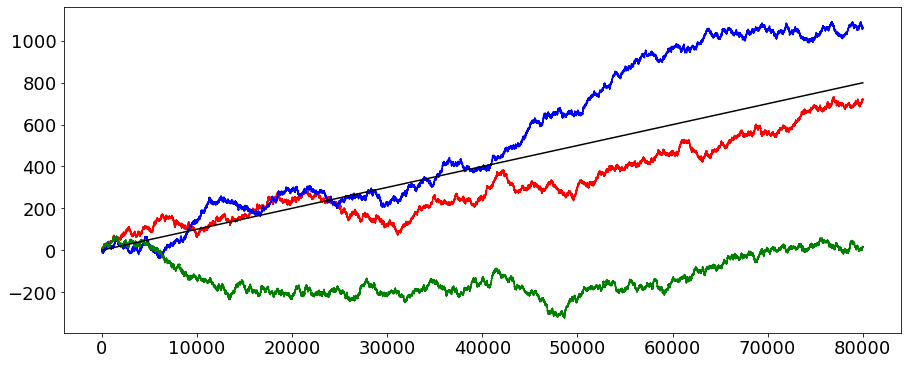

In [25]:
trend = delta * np.arange(length)

y1 = np.zeros(length, dtype=np.float32)
for l in range(length-1):
    y1[l+1] = delta + y1[l] + random.gauss(mean, std)

y2 = np.zeros(length, dtype=np.float32)
for l in range(length-1):
    y2[l+1] = delta + y2[l] + random.gauss(mean, std)

y3 = np.zeros(length, dtype=np.float32)
for l in range(length-1):
    y3[l+1] = delta + y3[l] + random.gauss(mean, std)

plt.plot(y1, 'r')
plt.plot(y2, 'b')
plt.plot(y3, 'g')
plt.plot(trend, 'k')

## まとめ
- ランダムウォークは時間経過とともに、ひたすらノイズを足していくことに起因して、トレンドからのずれが大きくなっていく
- このことは、一般に長期的な予測を行うと誤差が目立ってくることと同様の話